# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

C:\Users\csav6865\Documents\GitHub\picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

In [3]:
RUN = pica.FullRun('example_data/HKDS2009_IsoWater_20191123_121229.csv')

Running the corrections for Oxygen 
 ... 
 ...
Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type


C:\Users\csav6865\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Checking: VB033 ...
Standard dev is good
11439.0
Checking: VB034 ...
Standard dev is good
11440.0
Checking: VB036 ...
Standard dev is good
11442.0
Checking: VB026 ...
Standard dev is good
11431.0
Checking: VB037 ...
Standard dev is good
11443.0
11420.0
Checking: VB038 ...
Standard dev is good
11444.0
Checking: VB031 ...
Standard dev is good
11437.0
Checking: VB020 ...
Standard dev too high get rid of measurement 1
11424.0
Checking: VB030 ...
Standard dev is good
11435.0
Checking: VB025 ...
Standard dev is good
11430.0
Checking: VB035 ...
Standard dev is good
11441.0
11421.0
Checking: VB027 ...
Standard dev is good
11432.0
Checking: VB023 ...
Standard dev is good
11428.0
Checking: VB032 ...
Standard dev is good
11438.0
Checking: VB024 ...
Standard dev too high get rid of measurement 2
11429.0
11419.0
11422.0
Checking: VB022 ...
Standard dev is good
11426.0
Checking: VB021 ...
Standard dev is good
11425.0
Checking: VB029 ...
Standard dev too high get rid of measurement 3
11434.0
Checking

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```RUN = Picarro.FullRun(filename)```

and returns two instances of the Merged class.

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns one object of class **Merge**. This instance of class **Merged** has two class variables: O18 and D, which are themselves of Class **Isotope**, so all the above methods can be called on them.

Example usage:

``` RUN = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


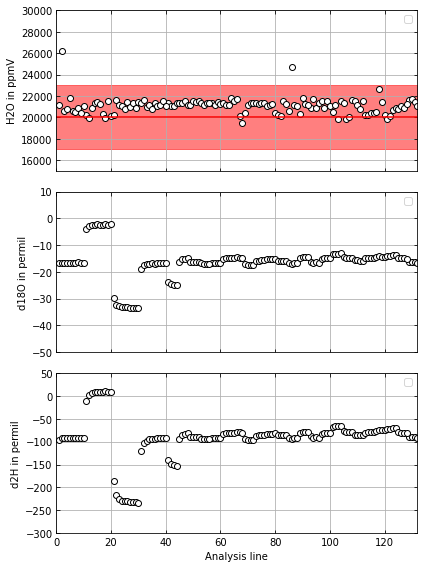

In [4]:
RUN.O18.plotSummary()

In [5]:
RUN.O18.memory.iloc[34:38].index.values

array([('HUSN', 'Control HUSN', 1), ('HUSN', 'Control HUSN', 2),
       ('HUSN', 'Control HUSN', 3), ('HUSN', 'Control HUSN', 4)],
      dtype=object)

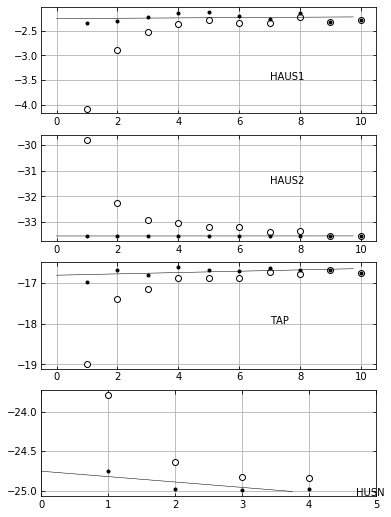

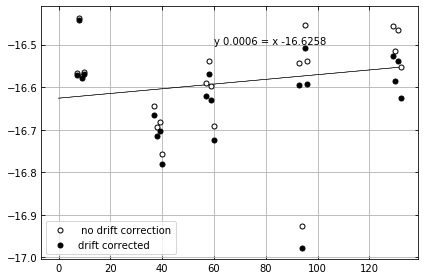

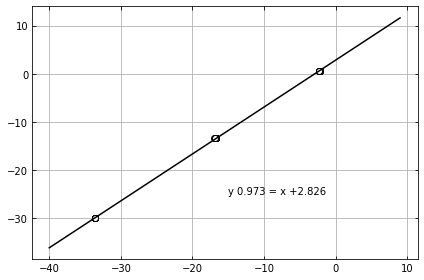

In [6]:
RUN.O18.memCorrPlot("O")
RUN.O18.driftCorrPlot("O")
RUN.O18.VSMOWCorrPlot("O")

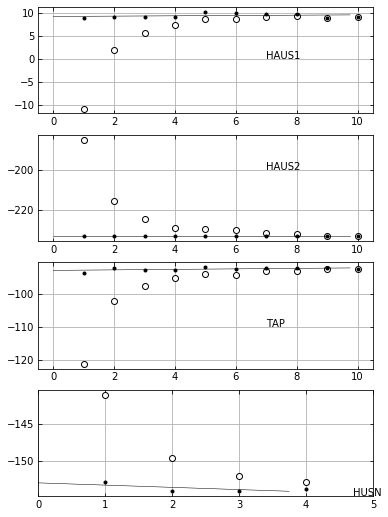

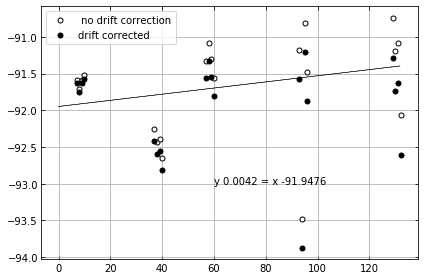

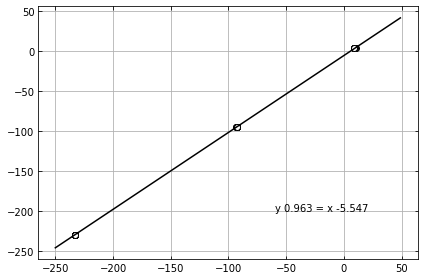

In [7]:
RUN.D.memCorrPlot("H")
RUN.D.driftCorrPlot("H")
RUN.D.VSMOWCorrPlot("H")

In [8]:
RUN.D.drift.head(40)

key  Line  d(D_H)Mean  \
Identifier 1 Identifier 2 Inj Nr                              
TAP          Conditioning 7       11419.0   7.0     -91.592   
                          8       11419.0   8.0     -91.711   
                          9       11419.0   9.0     -91.590   
                          10      11419.0  10.0     -91.525   
HAUS1        Standard     1       11420.0  11.0     -10.835   
                          2       11420.0  12.0       1.931   
                          3       11420.0  13.0       5.649   
                          4       11420.0  14.0       7.394   
                          5       11420.0  15.0       8.708   
                          6       11420.0  16.0       8.774   
                          7       11420.0  17.0       9.069   
                          8       11420.0  18.0       9.369   
                          9       11420.0  19.0       8.865   
                          10      11420.0  20.0       9.227   
HAUS2        Standard     1       11421.0  21.0    -185.085   
                          2       11421.0  22.0    -215.499   
                          3       11421.0  23.0    -224.514   
                          4       11421.0  24.0    -228.804   
                          5       11421.0  25.0    -229.236   
                          6       11421.0  26.0    -229.920   
                          7       11421.0  27.0    -231.407   
                          8       11421.0  28.0    -231.675   
                          9       11421.0  29.0    -232.623   
                          10      11421.0  30.0    -232.937   
TAP          Standard     1       11422.0  31.0    -121.223   
                          2       11422.0  32.0    -102.395   
                          3       11422.0  33.0     -97.825   
                          4       11422.0  34.0     -95.186   
                          5       11422.0  35.0     -94.201   
                          6       11422.0  36.0     -94.285   
                          7       11422.0  37.0     -93.149   
                          8       11422.0  38.0     -93.166   
                          9       11422.0  39.0     -92.567   
                          10      11422.0  40.0     -92.650   
HUSN         Control HUSN 1       11423.0  41.0    -140.980   
                          2       11423.0  42.0    -149.585   
                          3       11423.0  43.0    -151.986   
                          4       11423.0  44.0    -152.812   
VB020        JP           1       11424.0  45.0     -94.989   
                          2       11424.0  46.0     -85.408   

                                  d(D_H)mem_corrected  Error Code  \
Identifier 1 Identifier 2 Inj Nr                                    
TAP          Conditioning 7                -91.592000         0.0   
                          8                -91.711000         0.0   
                          9                -91.590000         0.0   
                          10               -91.525000         0.0   
HAUS1        Standard     1                  9.036053         0.0   
                          2                  9.182899         0.0   
                          3                  9.150788         0.0   
                          4                  9.111589         0.0   
                          5                 10.263611         0.0   
                          6                 10.039319         0.0   
                          7                  9.708572         0.0   
                          8                  9.897551         0.0   
                          9                  8.995394         0.0   
                          10                 9.227000         0.0   
HAUS2        Standard     1               -232.937076         0.0   
                          2               -232.937049         0.0   
                          3               -232.937153         0.0   
                          4               -232.937073         0.0   
           

In [15]:
RUN.coeffs

,O,H
1,0.862583,0.753736
2,0.957565,0.922403
3,0.979627,0.963964
4,0.983701,0.982636
5,0.989100,0.984480
6,0.989100,0.987385
7,0.994579,0.993642
8,0.994579,0.994761
9,0.999415,0.998701
10,1.000000,1.000000


#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [10]:
RUN.coeffs["H"]

1     0.753736
2     0.922403
3     0.963964
4     0.982636
5     0.984480
6     0.987385
7     0.993642
8     0.994761
9     0.998701
10    1.000000
Name: H, dtype: float64

In [16]:
RUN.suggestedReruns()

Checking for triplicates...
Some samples were not triplicated
key
11434.0    VB029
Name: Identifier 1, dtype: object


Checking for high standard deviations ...
Suggested reruns for following samples, which had high standard deviations
key
11423.0    HUSN
11436.0     TAP
Name: Identifier 1, dtype: object


Checking for samples lying outside of the GWML ...
Suggested reruns for following samples, which were outside of the GMWL
key
11420.0    HAUS1
Name: Identifier 1, dtype: object




In [18]:
RUN.trimmed

,Identifier 1,Identifier 2,RUN_ID,position,d18O vsmow,d18O stdev. vsmow,d18O counts,d2H vsmow,d2H stdev. vsmow,d2H counts
key,,,,,,,,,,
11423.0,HUSN,_Control HUSN,2.019112e+13,5.0,-21.456463,0.111029,4,-153.730487,0.549572,4
11424.0,VB020,JP,2.019112e+13,6.0,-11.633119,0.022131,3,-83.222684,0.258574,4
11425.0,VB021,JP,2.019112e+13,7.0,-13.177311,0.075452,4,-93.297374,0.454519,4
11426.0,VB022,JP,2.019112e+13,8.0,-13.714858,0.053648,4,-96.905774,0.150893,4
11428.0,VB023,JP,2.019112e+13,10.0,-11.650549,0.083845,4,-83.059433,0.333950,4
11429.0,VB024,JP,2.019112e+13,11.0,-11.673109,0.097759,3,-82.933360,0.393909,4
11430.0,VB025,JP,2.019112e+13,12.0,-14.165770,0.044783,4,-99.400242,0.317762,4
11431.0,VB026,JP,2.019112e+13,13.0,-12.482752,0.075097,4,-87.775544,0.150558,4
11432.0,VB027,JP,2.019112e+13,14.0,-11.961052,0.016578,4,-85.182045,0.237222,4


In [13]:
import numpy as np

In [14]:
x = np.arange(1,4)
x

array([1, 2, 3])